In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame = True)
X = iris.data[['petal length (cm)','petal width (cm)']].values
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [2]:
# tree_clf.score(X,y)
# tree_clf.predict([[5,3]])

In [3]:
# from pathlib import Path
# IMAGES_PATH = Path()/ "images"/ "decision_tress"
# IMAGES_PATH.mkdir(parents = True,exist_ok  = True)

In [4]:
# from sklearn.tree import export_graphviz
# export_graphviz(
#      tree_clf,
#      out_file = str(IMAGES_PATH/ "iris_trees.dot"),
#      feature_names = ['petal length (cm)','petal width (cm)'],
#      class_names = iris.target_names,
#      rounded =True,
#      filled =True)

In [5]:
# !pip install graphviz
# from graphviz import Source

In [6]:
# Source.from_file(str(IMAGES_PATH/ "iris_trees.dot"))

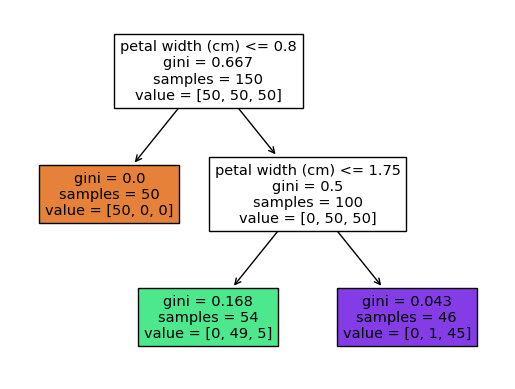

In [44]:
plot_tree(tree_clf,feature_names = ['petal length (cm)','petal width (cm)'], filled = True);

In [7]:
tree_clf.predict_proba([[5,3]]).round(2)

array([[0.  , 0.02, 0.98]])

# Regularization Hyperparameters

In [9]:
from sklearn.datasets import make_moons
X_moon,y_moon  = make_moons(n_samples = 150,noise = 0.5, random_state = 42)

tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 5,random_state = 42)

tree_clf1.fit(X_moon,y_moon)
tree_clf2.fit(X_moon,y_moon)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [10]:
tree_clf1.score(X_moon,y_moon)

1.0

In [11]:
tree_clf2.score(X_moon,y_moon)

0.8533333333333334

In [12]:
# help(DecisionTreeClassifier)

In [13]:
X_moon_test,y_moon_test = make_moons(n_samples = 100,noise = 0.2,random_state = 42)

tree_clf1.score(X_moon_test,y_moon_test)

0.79

In [14]:
tree_clf2.score(X_moon_test,y_moon_test)


0.86

# Regression

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200,1)-0.5
y_quad = X_quad**2+0.025*np.random.randn(200,1)

tree_reg = DecisionTreeRegressor(max_depth = 2,random_state = 42)
tree_reg.fit(X_quad,y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [17]:
tree_reg.score(X_quad,y_quad)

0.7966018355059642

In [18]:
# export_graphviz(
#      tree_reg,
#      out_file = str(IMAGES_PATH/ "iris_trees.dot"),
#      feature_names = ['x1'],
#      rounded =True,
#      filled =True
#  )
# Source.from_file(str(IMAGES_PATH/ "iris_trees.dot"))

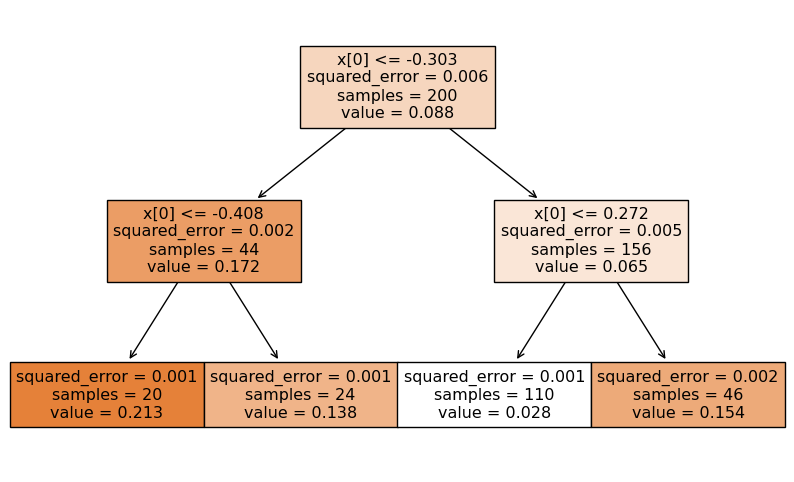

In [57]:
plt.figure(figsize = (10,6))
plot_tree(tree_reg,filled = True);

In [19]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

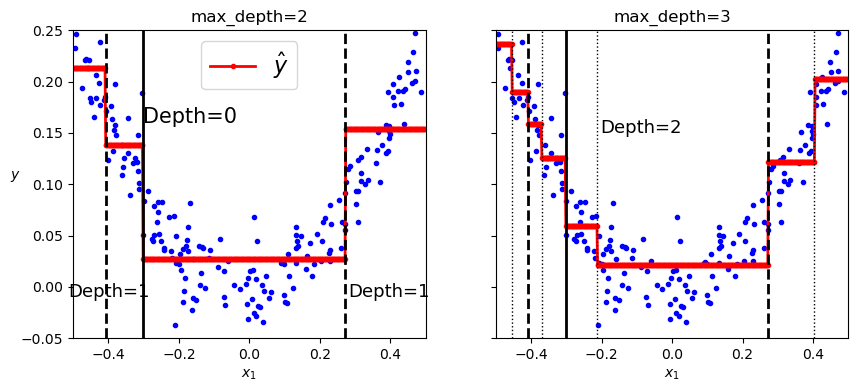

In [20]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

plt.show()

In [59]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(),
                            PCA(),
                            DecisionTreeClassifier(max_depth = 2,random_state =42))
pca_pipeline.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, random_state=42))])